In [1]:
# evaluating preliminary models and their noise amplification qualities
import sys
import matplotlib.pyplot as plt
import numpy as np
from utils import embed_signal_torch
import torch
from torch.optim import AdamW
import torch.nn as nn

%load_ext autoreload
%autoreload 2
from dysts.flows import Lorenz
from utils import train, make_dataset

sys.path.append("/om2/user/ostrow/NN_delay_embeddings/nn_delay_embeddings/")
sys.path.append("/om2/user/ostrow/NN_delay_embeddings/nn_delay_embeddings/src")
from models import GPT, LRU, Mamba, RNN

(1000, 300, 3) torch.Size([1000, 100, 1])
(1000, 300, 3) torch.Size([1000, 100, 1])
(1000, 300, 3)


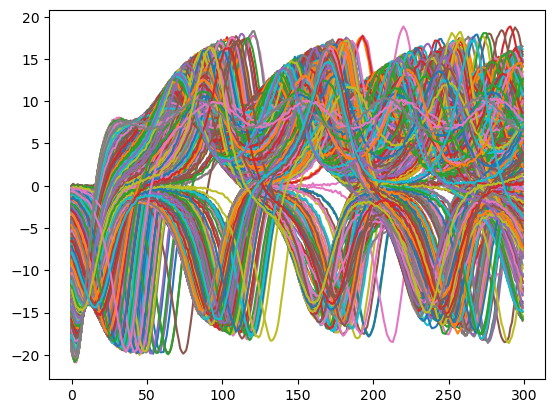

In [3]:
# let's train it
obs_noise = 0.1
batch_size = 8
length = 100
nsamples = 1000
dt = 0.01
train_loader, val_loader, train_data, val_data = make_dataset(
    Lorenz, length, nsamples, obs_noise=obs_noise, batch_size=batch_size, dt=dt
)
print(train_data.shape)
plt.figure()
for i in range(0, 1000, 1):
    plt.plot(train_data[i, :1000, 0])

In [28]:
joint_kwargs = dict(
    input_dim=1,
    d_model=100,
    mlp_hidden=10,
)

In [34]:
# GPT
gpt_kwargs = dict(
    n_head=1,
    context_length=100,
    seed=11,
    temp=None,
    use_pe=False,
)

gpt = GPT(**joint_kwargs, **gpt_kwargs)

In [39]:
# LRU

lru_kwargs = dict(d_state=100, rmin=0.8, rmax=0.99, siso=False)

lru = LRU(**joint_kwargs, **lru_kwargs)

In [31]:
# Mamba

mamba_kwargs = dict(
    dt_rank=10,
    d_state=100,
)

mamba = Mamba(**joint_kwargs, **mamba_kwargs)

TypeError: MinimalMamba.__init__() got an unexpected keyword argument 'mlp_hidden'

In [48]:
epochs = 100
lr = 1e-3
# model = lru

lru, lru_train_loss, lru_val_loss = train(
    lru, train_loader, val_loader, epochs, lr, AdamW, nn.MSELoss(), "cuda"
)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0 Training Loss: 6.527926046848297


  1%|          | 1/100 [00:01<02:54,  1.76s/it]

Epoch 0 Validation Loss: 0.8210889225006104
Epoch 1 Training Loss: 0.35797958958148957


  2%|▏         | 2/100 [00:03<03:03,  1.87s/it]

Epoch 1 Validation Loss: 0.19732580637931824
Epoch 2 Training Loss: 0.2088849447965622


  3%|▎         | 3/100 [00:05<02:58,  1.85s/it]

Epoch 2 Validation Loss: 0.14576788341999053
Epoch 3 Training Loss: 0.162894440472126


  4%|▍         | 4/100 [00:07<02:55,  1.83s/it]

Epoch 3 Validation Loss: 0.1447564188838005
Epoch 4 Training Loss: 0.13372010499238968


  5%|▌         | 5/100 [00:09<03:05,  1.96s/it]

Epoch 4 Validation Loss: 0.10056186673045159
Epoch 5 Training Loss: 0.13503429090976715


  6%|▌         | 6/100 [00:11<02:57,  1.89s/it]

Epoch 5 Validation Loss: 0.09520856335759163
Epoch 6 Training Loss: 0.1147397695183754


  7%|▋         | 7/100 [00:13<02:53,  1.86s/it]

Epoch 6 Validation Loss: 0.17902596241235733
Epoch 7 Training Loss: 0.14310958495736123


  8%|▊         | 8/100 [00:14<02:48,  1.83s/it]

Epoch 7 Validation Loss: 0.20472033995389938
Epoch 8 Training Loss: 0.10642189705371857


  9%|▉         | 9/100 [00:16<02:45,  1.81s/it]

Epoch 8 Validation Loss: 0.23743454730510713
Epoch 9 Training Loss: 0.09925999107956886


 10%|█         | 10/100 [00:18<02:43,  1.82s/it]

Epoch 9 Validation Loss: 0.1185049558877945
Epoch 10 Training Loss: 0.1775155470967293


 11%|█         | 11/100 [00:20<02:40,  1.80s/it]

Epoch 10 Validation Loss: 0.07037493941187858
Epoch 11 Training Loss: 0.0756062013208866


 12%|█▏        | 12/100 [00:21<02:38,  1.80s/it]

Epoch 11 Validation Loss: 0.0740821811556816
Epoch 12 Training Loss: 0.09354281398653984


 13%|█▎        | 13/100 [00:23<02:35,  1.79s/it]

Epoch 12 Validation Loss: 0.1081736906170845
Epoch 13 Training Loss: 0.07445392319560051


 14%|█▍        | 14/100 [00:25<02:33,  1.79s/it]

Epoch 13 Validation Loss: 0.06047776880860329
Epoch 14 Training Loss: 0.08838184693455696


 15%|█▌        | 15/100 [00:27<02:39,  1.88s/it]

Epoch 14 Validation Loss: 0.11256690227985382
Epoch 15 Training Loss: 0.08191639241576194


 16%|█▌        | 16/100 [00:29<02:40,  1.91s/it]

Epoch 15 Validation Loss: 0.12247067219018937
Epoch 16 Training Loss: 0.07337595283985138


 17%|█▋        | 17/100 [00:31<02:36,  1.89s/it]

Epoch 16 Validation Loss: 0.09407164850831032
Epoch 17 Training Loss: 0.2596710841655731


 18%|█▊        | 18/100 [00:33<02:40,  1.96s/it]

Epoch 17 Validation Loss: 0.07792129015922547
Epoch 18 Training Loss: 0.07221593371033669


 19%|█▉        | 19/100 [00:35<02:48,  2.08s/it]

Epoch 18 Validation Loss: 0.07041431480646133
Epoch 19 Training Loss: 0.06447671550512314


 20%|██        | 20/100 [00:38<02:55,  2.20s/it]

Epoch 19 Validation Loss: 0.061096687406301496
Epoch 20 Training Loss: 0.06490058296918869


 21%|██        | 21/100 [00:40<02:47,  2.12s/it]

Epoch 20 Validation Loss: 0.05658279283344746
Epoch 21 Training Loss: 0.05906878080964088


 22%|██▏       | 22/100 [00:42<02:46,  2.14s/it]

Epoch 21 Validation Loss: 0.062064410865306854
Epoch 22 Training Loss: 0.14679054296016694


 23%|██▎       | 23/100 [00:44<02:38,  2.06s/it]

Epoch 22 Validation Loss: 0.21581245827674866
Epoch 23 Training Loss: 0.0889120101928711


 24%|██▍       | 24/100 [00:46<02:46,  2.19s/it]

Epoch 23 Validation Loss: 0.09834775120019913
Epoch 24 Training Loss: 0.06527646726369858


 25%|██▌       | 25/100 [00:49<02:42,  2.16s/it]

Epoch 24 Validation Loss: 0.10434772664308548
Epoch 25 Training Loss: 0.06471004968881607


 26%|██▌       | 26/100 [00:51<02:47,  2.27s/it]

Epoch 25 Validation Loss: 0.05835695603489876
Epoch 26 Training Loss: 0.0659586688876152


 27%|██▋       | 27/100 [00:53<02:43,  2.24s/it]

Epoch 26 Validation Loss: 0.062453567743301394
Epoch 27 Training Loss: 0.058234509781002995


 28%|██▊       | 28/100 [00:55<02:36,  2.17s/it]

Epoch 27 Validation Loss: 0.052472763016819954
Epoch 28 Training Loss: 0.09519264352321624


 29%|██▉       | 29/100 [00:57<02:26,  2.06s/it]

Epoch 28 Validation Loss: 0.06754041507840157
Epoch 29 Training Loss: 0.07227863731980323


 29%|██▉       | 29/100 [00:59<02:24,  2.04s/it]


OutOfMemoryError: CUDA out of memory. Tried to allocate 2.00 MiB. GPU 0 has a total capacity of 23.64 GiB of which 3.56 MiB is free. Including non-PyTorch memory, this process has 23.63 GiB memory in use. Of the allocated memory 22.13 GiB is allocated by PyTorch, and 1.30 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
gpt, gpt_train_loss, gpt_val_loss = train(
    gpt, train_loader, val_loader, epochs, lr, AdamW, nn.MSELoss(), "cuda"
)

1.961195324897766 1.888592812538147


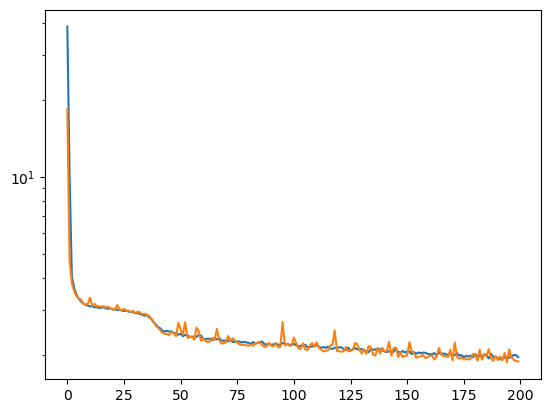

In [ ]:
plt.plot(lru_train_loss)
plt.plot(gpt_train_loss)
# plt.plot(val_loss)
# print(train_loss[-1], val_loss[-1])
plt.yscale("log")

In [44]:
tdata = torch.tensor(train_data[:, 200:, :1]).float()
tdata = tdata.cuda()

model = gpt
model.to("cuda")
out, hidden = model(tdata)
hidden = hidden.cpu().detach().numpy().squeeze()

out.shape, hidden.shape

(torch.Size([1000, 100, 1]), (1000, 100, 100))

In [45]:
if np.iscomplex(hidden).any():
    hidden = np.real(hidden)
    hidden = np.concatenate([np.real(hidden), np.imag(hidden)], axis=-1)
hidden.shape

(1000, 100, 100)

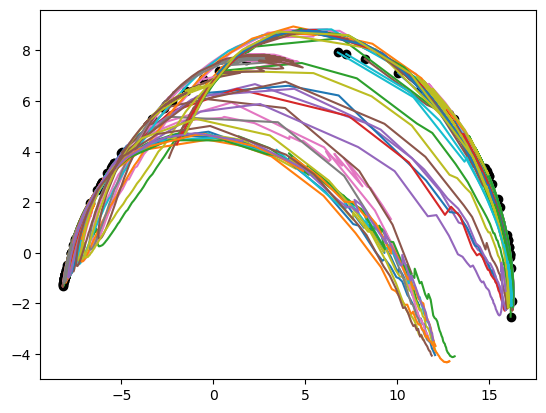

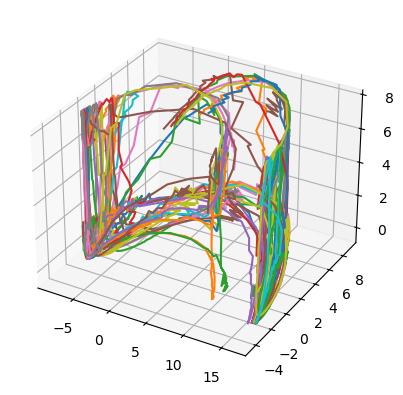

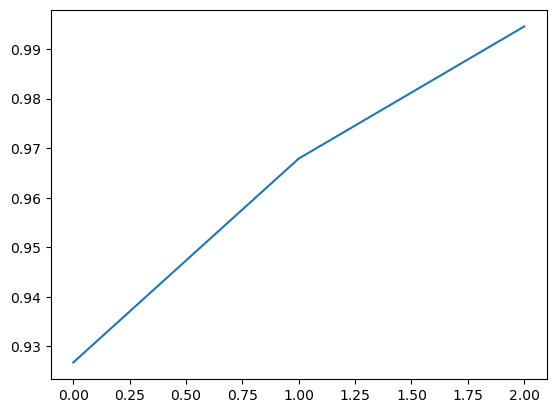

In [46]:
# run pca on the hidden states
from sklearn.decomposition import PCA

# hidden = hidden[]  # washout the first n

pca = PCA(n_components=3)
hflat = hidden.reshape(-1, hidden.shape[-1])
pca.fit(hflat)
hidden_pca = pca.transform(hflat).reshape((hidden.shape[0], hidden.shape[1], -1))

plt.figure()
# plt.plot(hidden_pca[:,0])
# plt.plot(hidden_pca[:,1])
for i in range(100):
    plt.plot(hidden_pca[i, :, 0], hidden_pca[i, :, 1])
    # plt.plot(hidden_pca[0, :, 0], hidden_pca[0, :, 1])
    plt.scatter(hidden_pca[i, 0, 0], hidden_pca[i, 0, 1], c="black")

# plot in 3d
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for i in range(100):
    ax.plot(hidden_pca[i, :, 0], hidden_pca[i, :, 1], hidden_pca[0, :, 2])
plt.figure()
# plot evr
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [47]:
from amplification import compute_noise_amp_k

k = 3
maxT = 10
sig, E_k, eps_k = compute_noise_amp_k(
    train_data[:, :, :1], hidden, k, maxT, normalize=True
)
sig

multiple trajectories found, recursing
multiple trajectories found, recursing
multiple trajectories found, recursing
multiple trajectories found, recursing
multiple trajectories found, recursing
multiple trajectories found, recursing
multiple trajectories found, recursing
multiple trajectories found, recursing
multiple trajectories found, recursing
multiple trajectories found, recursing


19.156256622293338